<a href="https://colab.research.google.com/github/Manoj-312002/Python/blob/master/house/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy import stats 
from sklearn.preprocessing import LabelEncoder  
import statsmodels.formula.api as smf
plt.style.use('seaborn-dark')

In [2]:
%cd /content
!git clone https://github.com/Manoj-312002/Python.git 
%cd Python/house

/content
Cloning into 'Python'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 90 (delta 29), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (90/90), done.
/content/Python/house


In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop(['Id'],axis=1)
print(train.shape)
train.dtypes.value_counts()

(1460, 80)


object     43
int64      34
float64     3
dtype: int64

In [14]:
obj = train.select_dtypes(include='object')
integer = train.select_dtypes(include='int64')
flo = train.select_dtypes(include='float64')
flo.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


skew 0.12134661989685333 kurtosis 0.809519155707878
skew -0.009228740596903805 kurtosis 0.8870294355416966


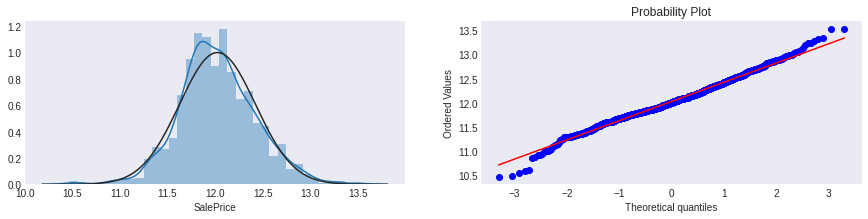

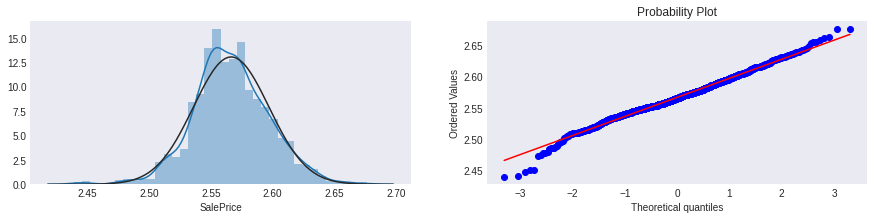

In [7]:
def disp_norm(data):
    print('skew {} kurtosis {}'.format(data.skew(),data.kurt()))
    #norm.fit(data)    # would give mean and std 
    plt.figure(figsize=(15,3))

    plt.subplot(1,2,1)
    sns.distplot(data,fit=norm)
    plt.subplot(1,2,2)
    stats.probplot(data,plot = plt)

disp_norm(train['SalePrice'])
train['SalePrice'] = np.log1p(train['SalePrice'])
disp_norm(train['SalePrice'])


In [0]:
integer.shape,flo.shape 

((1460, 34), (1460, 3))

In [0]:
a = train.columns 
b = pd.MultiIndex.from_arrays([train.dtypes.values,a])
train.columns = b
train.head()
train.sort_index(axis=1)

In [0]:
def box_graphs(data,a,b,c,d):
    fig = plt.figure(figsize=(c,d))
    l = len(data.columns)
    i = 1
    b = b*2
    while i < l*2:
        plt.subplot(a,b,i)
        sns.boxplot(y=data.iloc[:,i % l])
        i+=1

        plt.subplot(a,b,i)
        # plt.scatter(data.iloc[:,i % l],integer['SalePrice'],color=('deepskyblue'),alpha =0.2)
        sns.scatterplot(data.iloc[:,i % l],integer['SalePrice'],color='lightseagreen',alpha =0.7,linewidth = 0)
        i+=1
    plt.show()

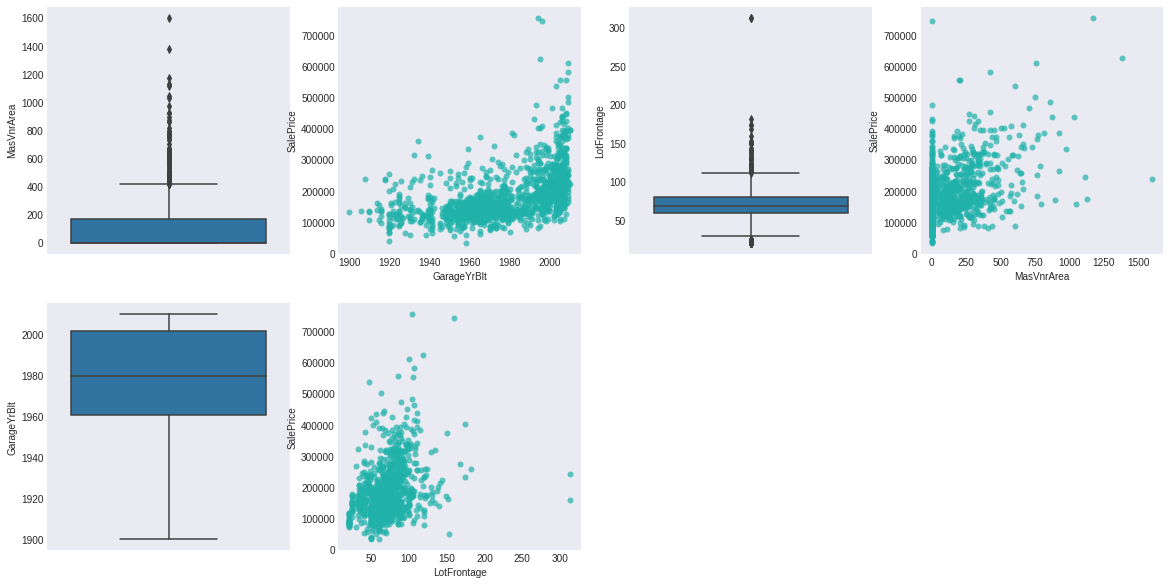

In [40]:
box_graphs(flo,2,2,20,10)

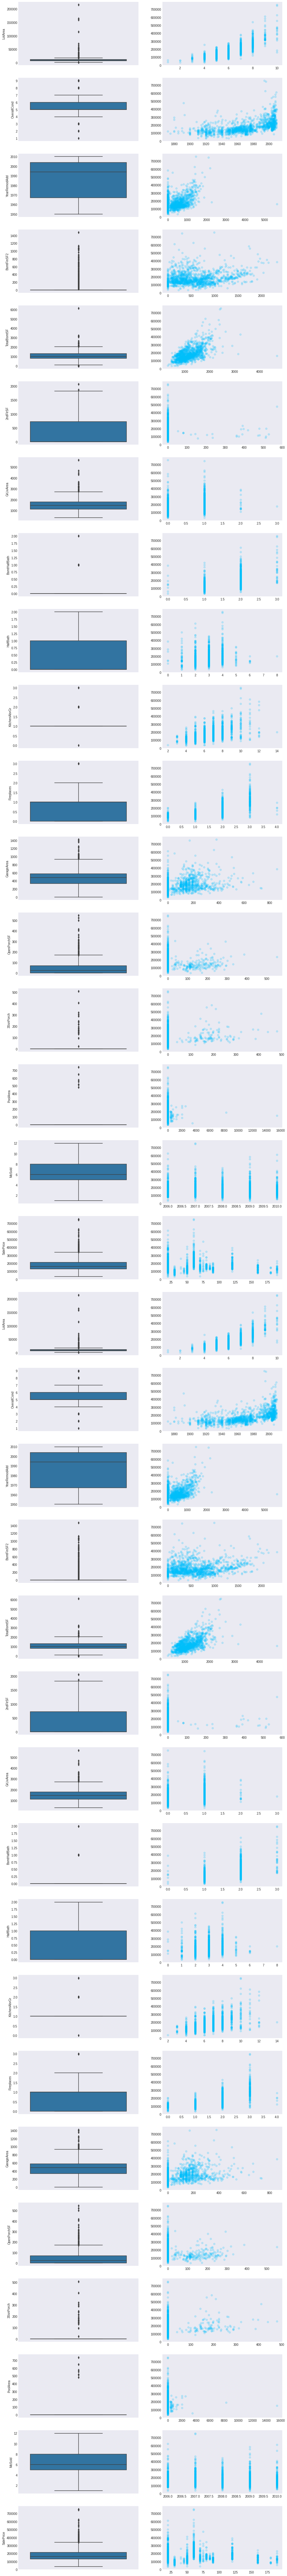

In [0]:
box_graphs(integer,34,1,15,150)

In [0]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

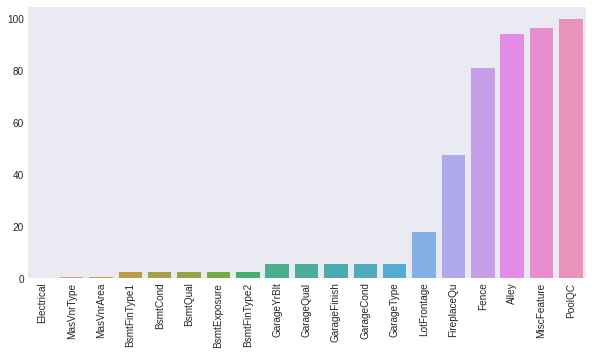

In [16]:
na = train.isna().sum().sort_values(ascending =True)
plt.figure(figsize=(10,5))
na = ((na/len(train))*100)[(na.values/len(train))*100 > 0]
sns.barplot(x =na.index,y = na.values)
plt.xticks(rotation = 90)
plt.show()

In [0]:
train[na.index].dtypes

Electrical       object
MasVnrType       object
MasVnrArea      float64
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
BsmtExposure     object
BsmtFinType2     object
GarageYrBlt     float64
GarageQual       object
GarageFinish     object
GarageCond       object
GarageType       object
LotFrontage     float64
FireplaceQu      object
Fence            object
Alley            object
MiscFeature      object
PoolQC           object
dtype: object

In [0]:
for col in categorical_col:
    label = LabelEncoder() 
    label.fit(list(dataset[col].values)) 
    dataset[col] = label.transform(list(dataset[col].values))

In [22]:
train.skew().sort_values(ascending = False ).head(10)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
dtype: float64

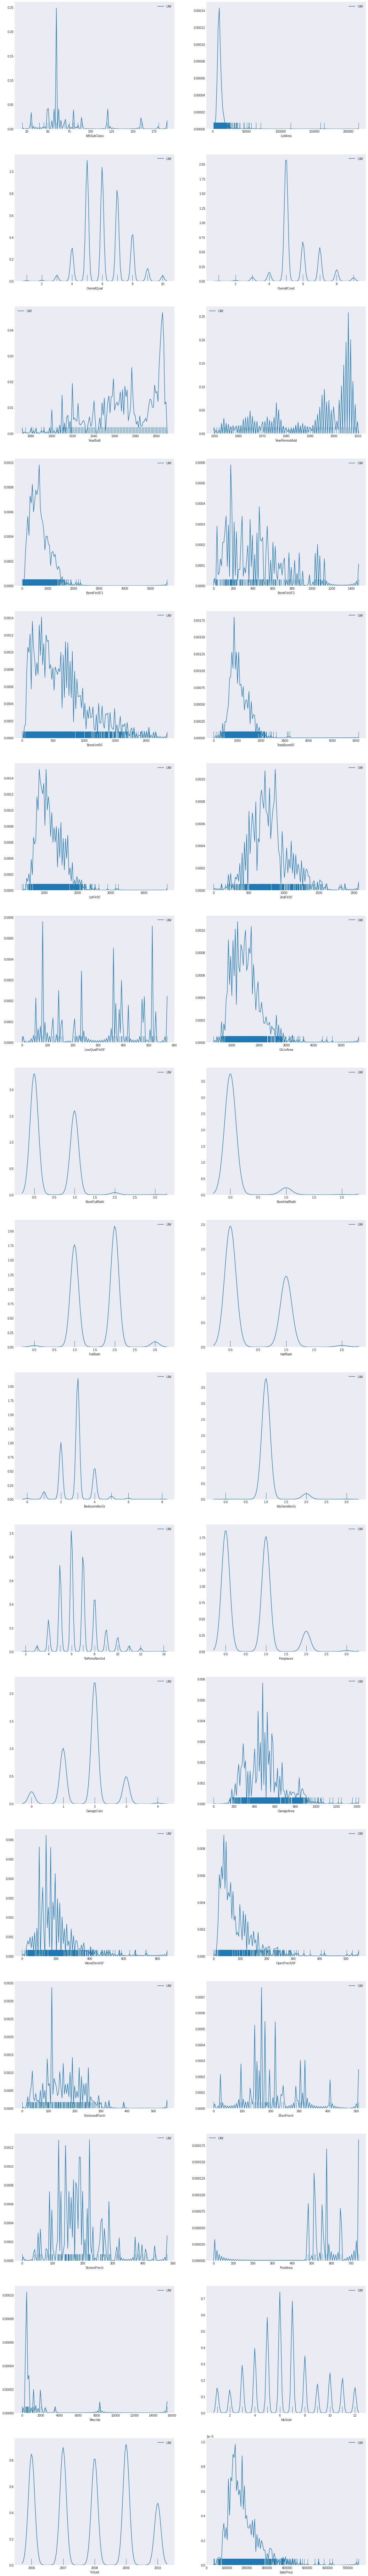

In [29]:
plt.figure(figsize=(20,150))
for i in range(len(integer.columns)):
    plt.subplot(17,2,i +1)
    sns.distplot(integer.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(integer.columns[i])

In [47]:
smf.ols('SalePrice ~ LotArea',data = train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.12e-24
Time:                        08:37:50   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.588e+05   2914.717     54.495      0.000    1.53e+05    1.65e+05
LotArea        2.1000      0.201     10.445      0.000       1.706       2.494
==============================================================================
Omnibus:                      587.660   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3374.003
Skew:                           1.788   Prob(JB):                         0.00
Kurtosis:                       9.532   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

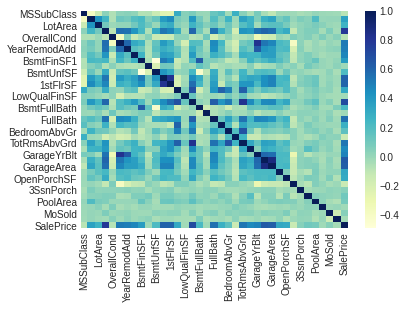

In [48]:
sns.heatmap(train.corr(),cmap='YlGnBu')

In [49]:
stats.